<a href="https://colab.research.google.com/github/fmanid/Tugas-Besar-PCVK-2022/blob/main/Tugas_Besar_PCVK_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colab library to upload files to notebook
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


width: 400 pixels
height: 369 pixels
channels: 3


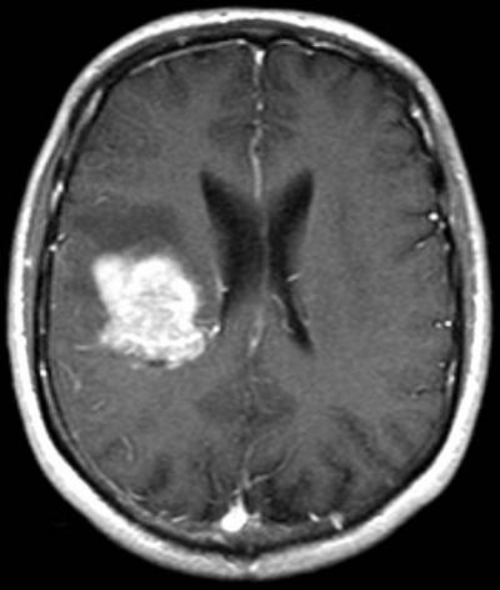

In [ ]:
img_path = "/content/drive/MyDrive/Brain Tumor/Y11.jpg"
image = cv2.imread(img_path)
print("width: {} pixels".format(image.shape[1])) # menghitung lebar
print("height: {} pixels".format(image.shape[0])) # menghitung tinggi
print("channels: {}".format(image.shape[2])) # menghitung channels
dim=(500,590)
image=cv2.resize(image, dim)
cv2_imshow( image)

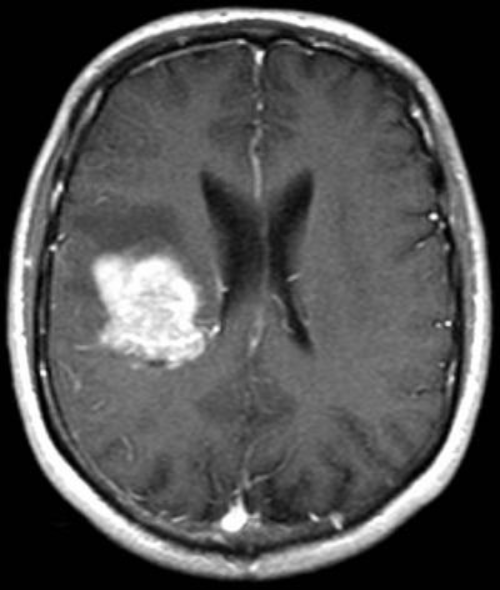

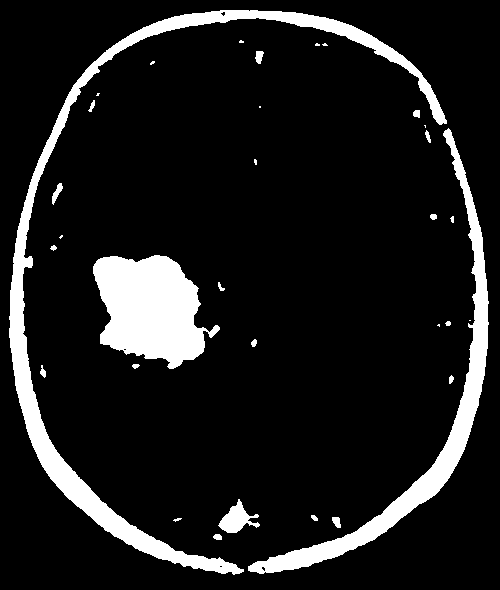

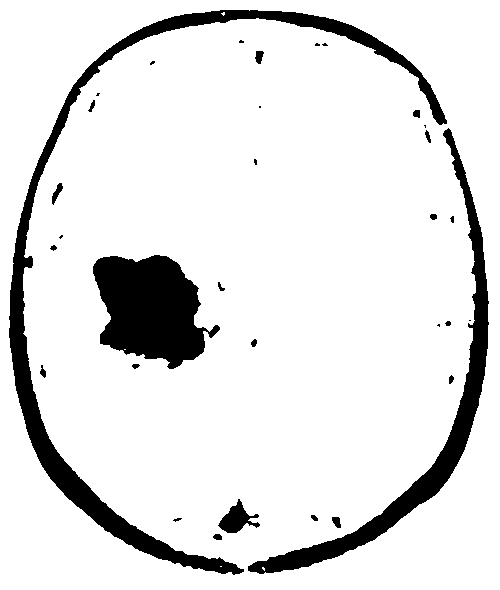

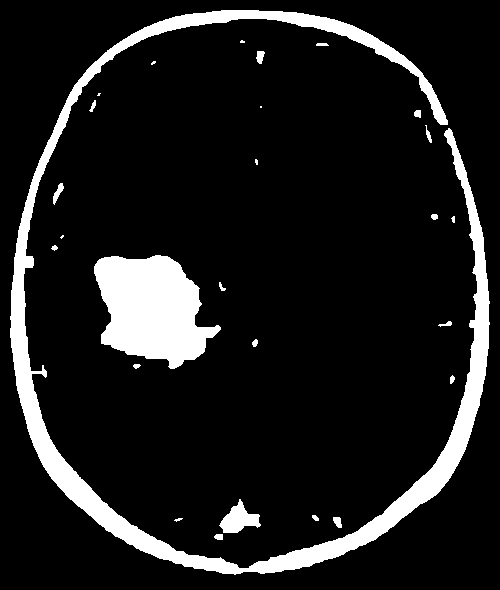

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY, 0.7)
cv2_imshow(gray) #menampilkan citra grayscale
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)  #menampilkan citra setelah dilakukan thresholding
(T, threshInv) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(threshInv) #menampilkan citra setelah dilakukan invertthresholding
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

In [ ]:
closed = cv2.erode(closed, None, iterations = 14) #erosi dengan iterasi 14
closed = cv2.dilate(closed, None, iterations = 13) #dilasi dengan iterasi 13

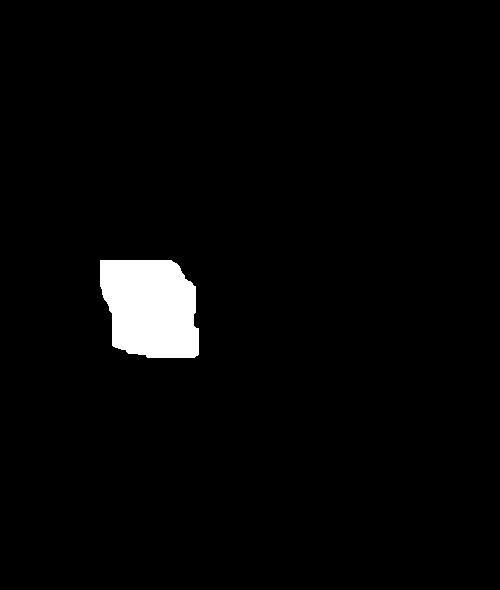

In [ ]:
cv2_imshow(closed)

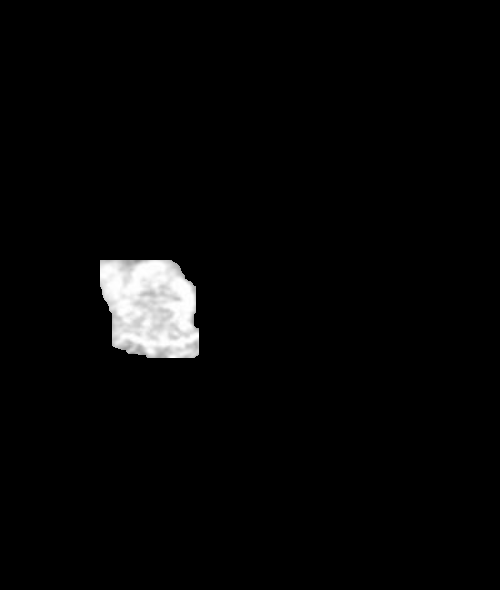

In [ ]:
ret,mask = cv2.threshold(closed, 155, 255, cv2.THRESH_BINARY) 
#apply AND operation on image and mask generated by thrresholding
final = cv2.bitwise_and(image,image,mask = mask) #operasi bitwise untuk image and mask
#plot the result
cv2_imshow(final)

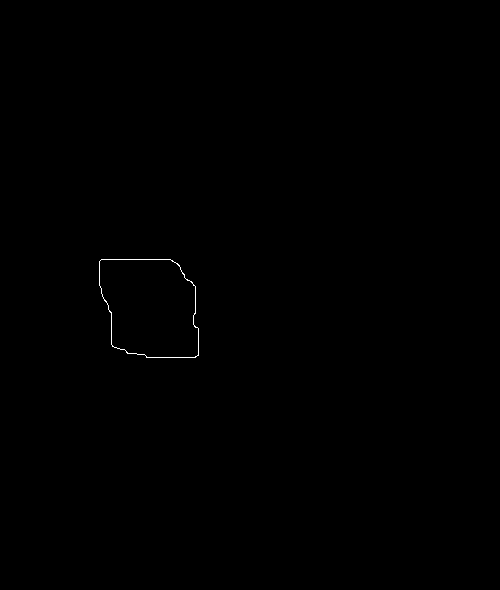

In [ ]:
def auto_canny(image, sigma=0.33):
  # compute the median of the single channel pixel intensities
  v = np.median(image)
  # apply automatic Canny edge detection using the computed median
  lower = int(max(0, (1.0 - sigma) * v))
  upper = int(min(255, (1.0 + sigma) * v))
  edged = cv2.Canny(image, lower, upper)
  # return the edged image
  return edged
canny = auto_canny(closed)
cv2_imshow(canny)

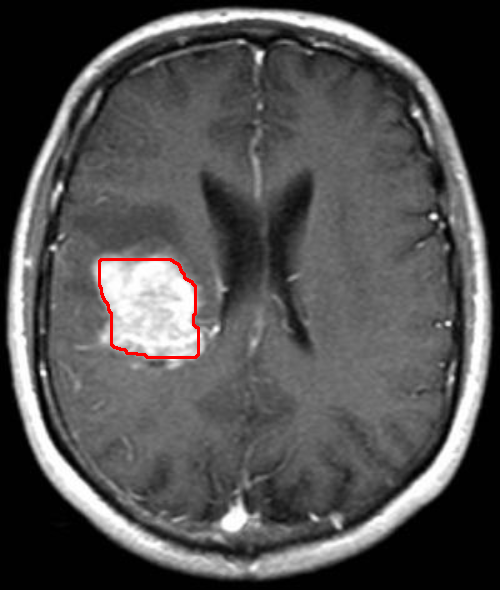

In [ ]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts, -1, (0, 0, 255), 2)
cv2_imshow(image) 